In [0]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from glob import glob


In [0]:
img='/content/elephant.jpg'

In [53]:
Inception=InceptionV3(input_shape=(299,299,3),weights='imagenet',include_top=True)

96116736/96112376 [==============================] - 3s 0us/step


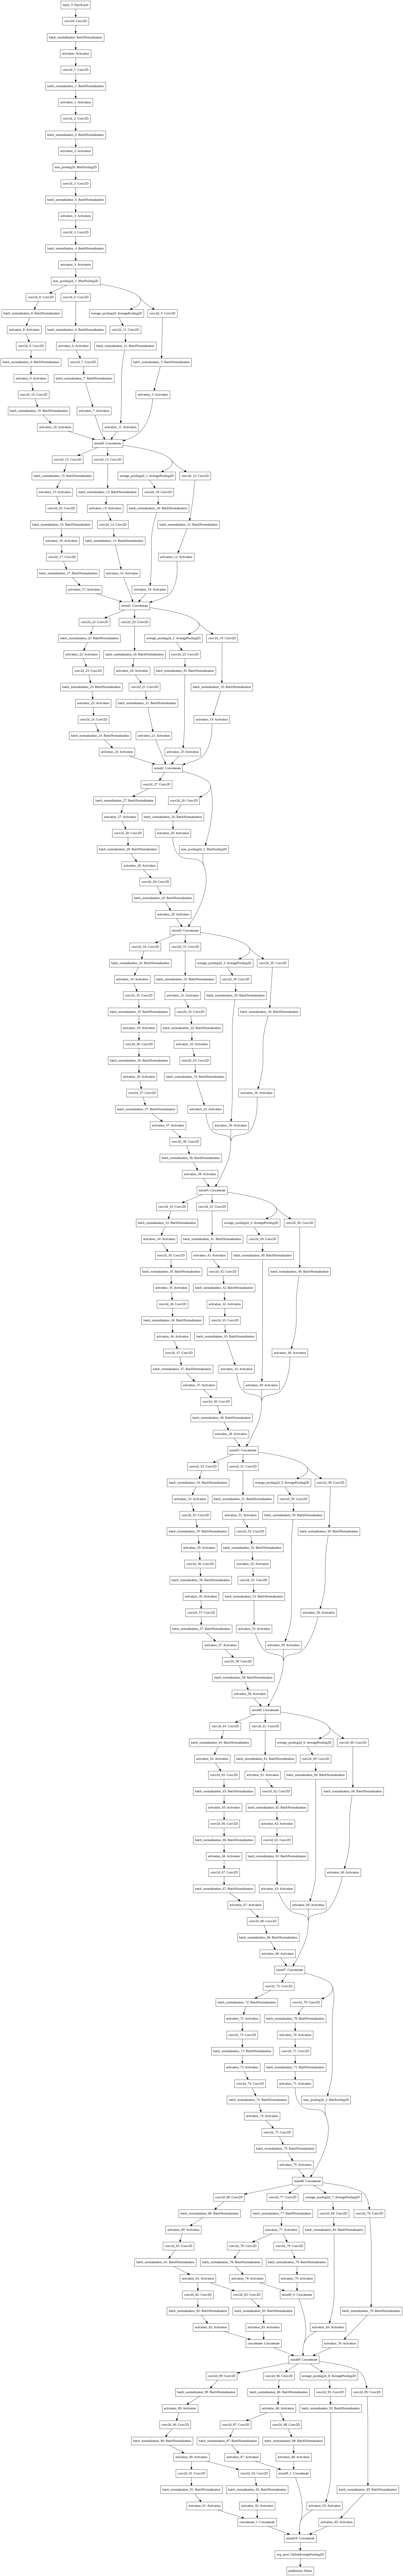

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(Inception, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [58]:
Inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
activation=Inception.get_layer('mixed10')

In [0]:
model=Model(inputs=Inception.input,outputs=activation.output)

In [0]:
final_dense=Inception.get_layer('predictions')

In [0]:
W=final_dense.get_weights()[0]

[('n02123159', 'tiger_cat', 0.71371704), ('n02123045', 'tabby', 0.1607686), ('n02124075', 'Egyptian_cat', 0.039307103), ('n03958227', 'plastic_bag', 0.01483054), ('n04033995', 'quilt', 0.011399591)]


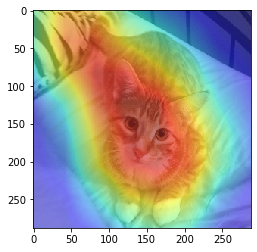

In [77]:
images=image.load_img('/content/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg',target_size=(299,299))
x=preprocess_input(np.expand_dims(images,0))
fmaps=model.predict(x)[0]
probs=Inception.predict(x)
classnames=decode_predictions(probs)[0]
print(classnames)
classname=classnames[0][1]
prod=np.argmax(probs[0])
w=W[:,prod]
cam=fmaps.dot(w)
cam=sp.ndimage.zoom(cam,(36,36),order=1)
plt.imshow(images,alpha=0.8)
plt.imshow(cam,cmap='jet',alpha=0.5)


[('n03770439', 'miniskirt', 0.23455705),
 ('n03595614', 'jersey', 0.20435555),
 ('n03814639', 'neck_brace', 0.09051176),
 ('n03594734', 'jean', 0.05014644),
 ('n04493381', 'tub', 0.029205894)]

In [47]:
classname

'miniskirt'

In [0]:
probs.